### Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [2]:
df=pd.read_csv("ToyotaCorolla - 1.csv")

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)

In [6]:
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
df2=df1.rename({'Age_08_04':'Age','Quarterly_Tax':'Quatax'},axis=1)
df2.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
df2[df2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
df2.drop_duplicates(inplace=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   Quatax  1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [11]:
df2

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
df2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Quatax    0
Weight    0
dtype: int64

In [13]:
df2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quatax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


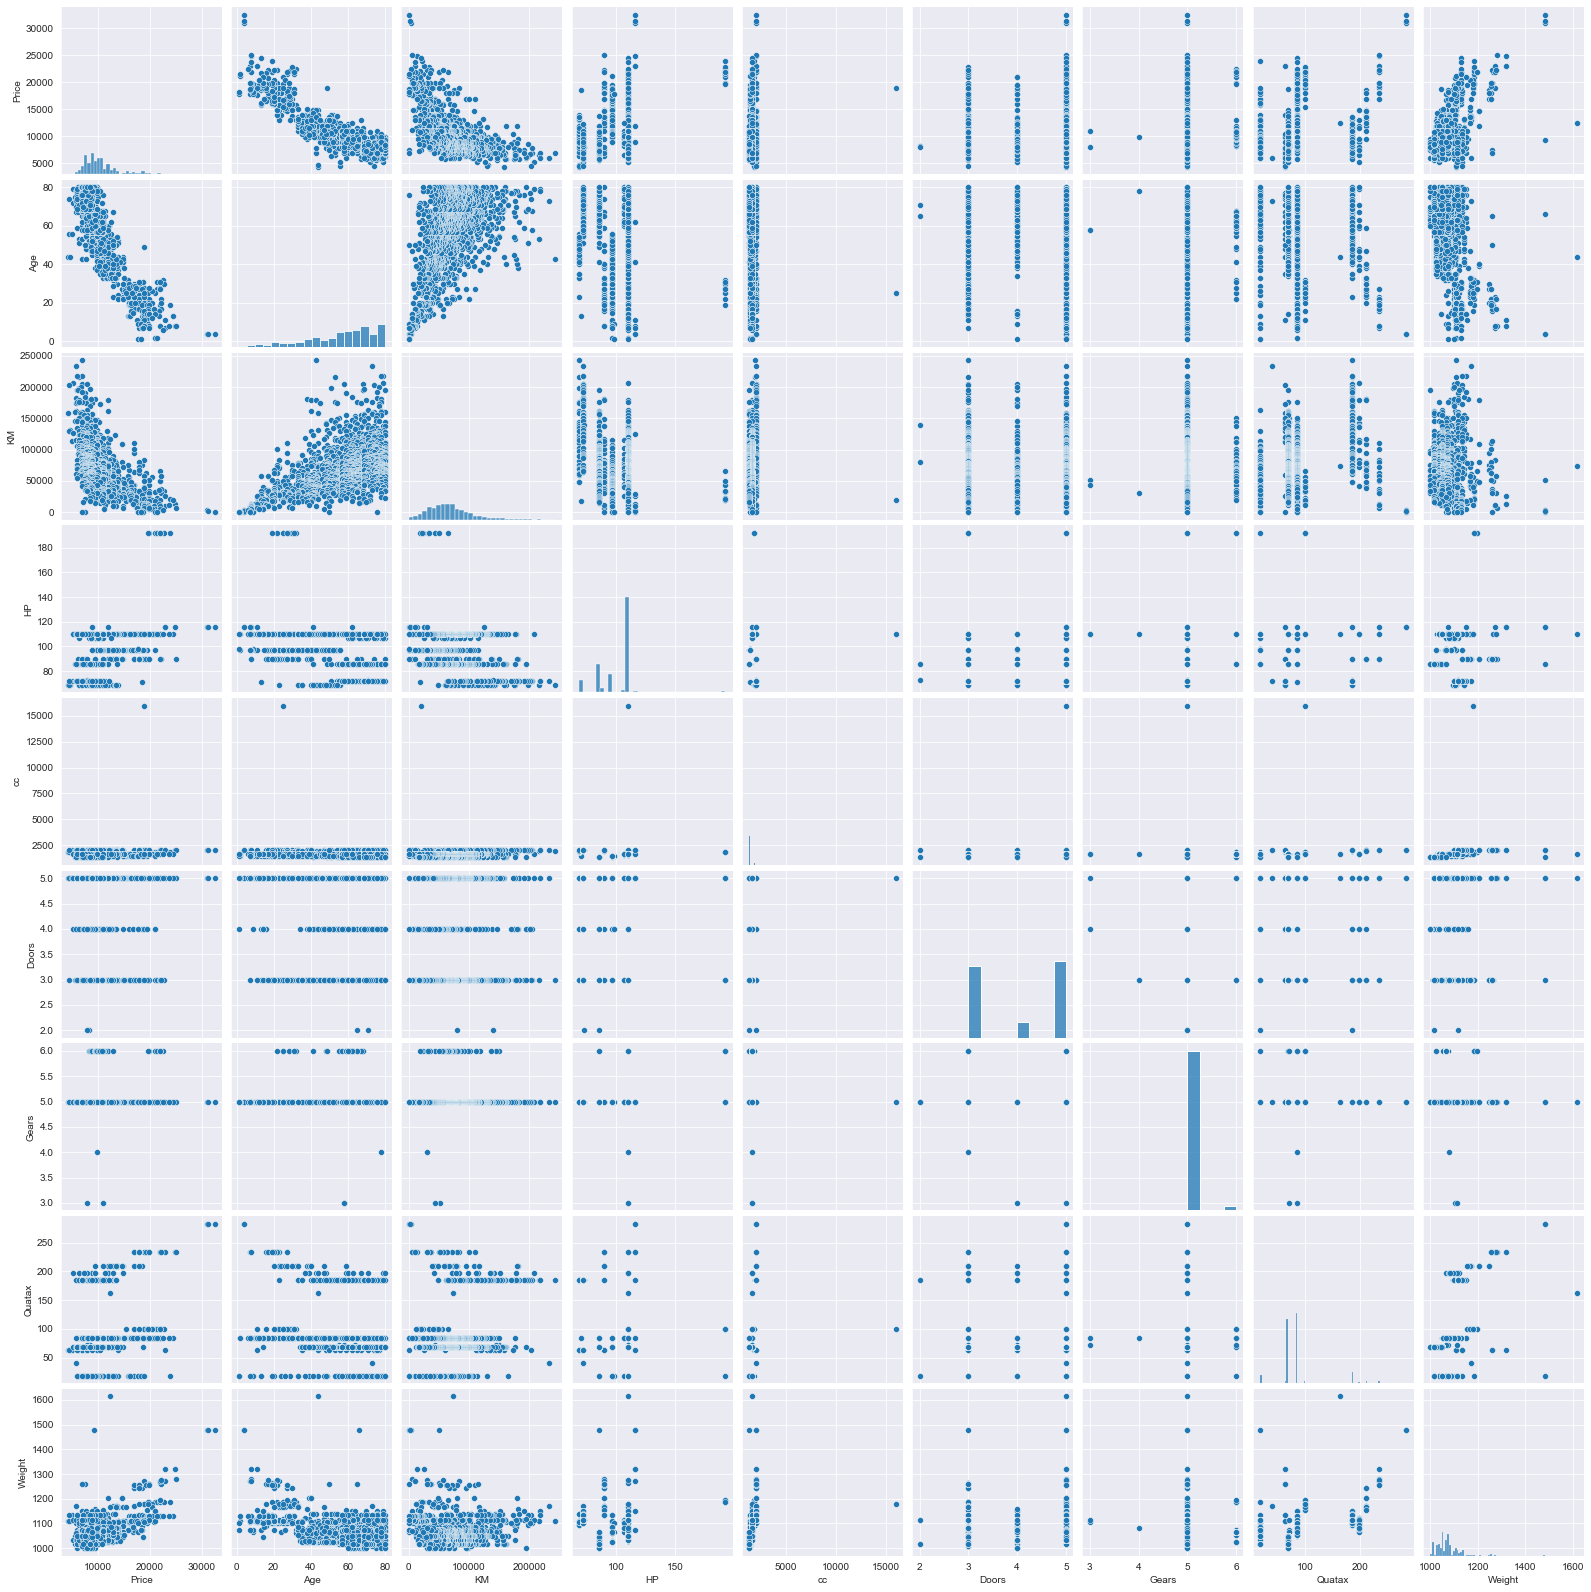

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(df2)

In [19]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quatax+Weight',data=df2).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:02:35   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Quatax         3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'

In [23]:
slr_c=smf.ols('Price~cc',data=df2).fit()


In [24]:
slr_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.29e-06
Time:                        23:04:45   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
slr_d=smf.ols('Price~Doors',data=df2).fit()

In [26]:
slr_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.40e-12
Time:                        23:05:21   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
mlr_cd=smf.ols('Price~cc+Doors',data=df2).fit()

In [28]:
mlr_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.55e-15
Time:                        23:08:33   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+Quatax+Weight',data=df2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Quatax+Weight',data=df2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+Quatax+Weight',data=df2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age+KM+HP+Doors+Gears+Quatax+Weight',data=df2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+Quatax+Weight',data=df2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+Quatax+Weight',data=df2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Quatax~Age+KM+HP+cc+Doors+Gears+Weight',data=df2).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Quatax',data=df2).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','Quatax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quatax,2.295375
7,Weight,2.487180


C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


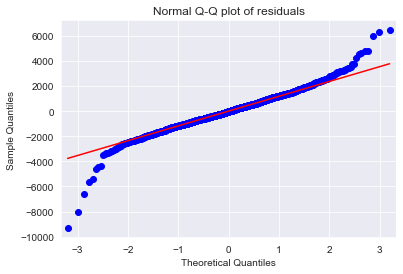

In [32]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [33]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [34]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [35]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

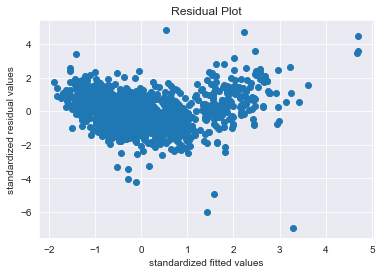

In [36]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

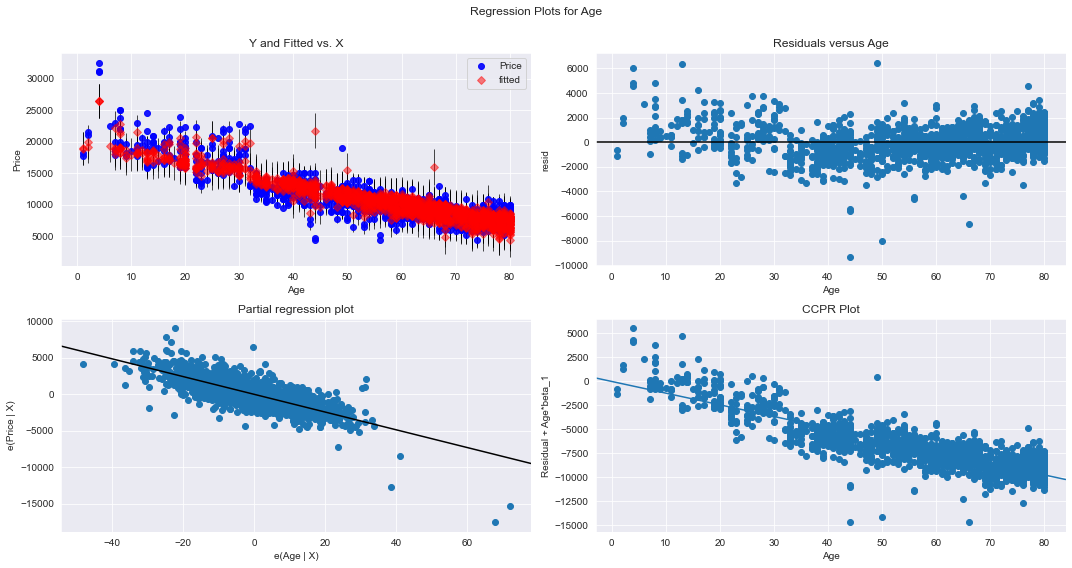

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

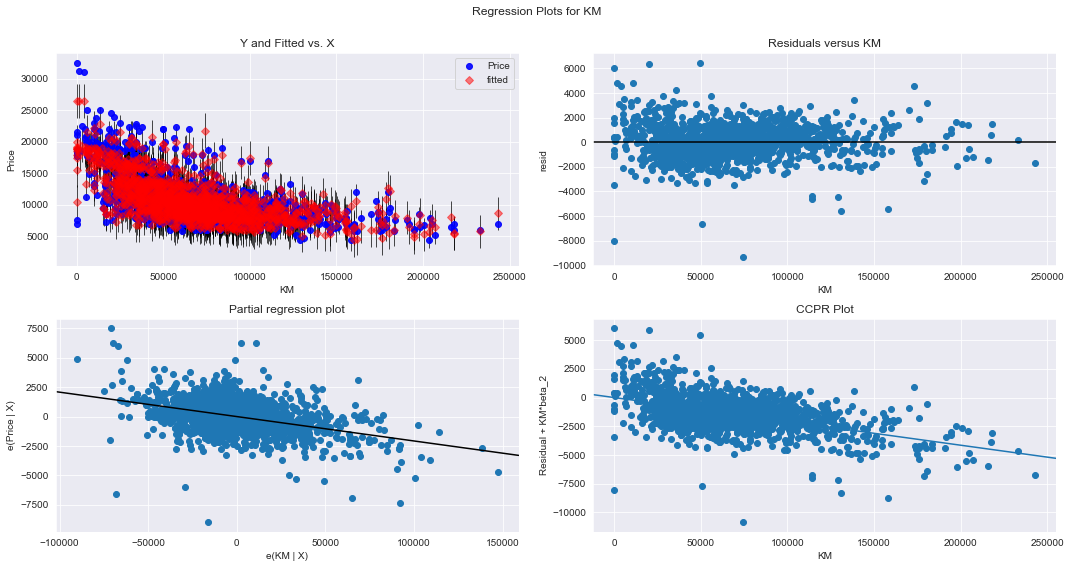

In [38]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

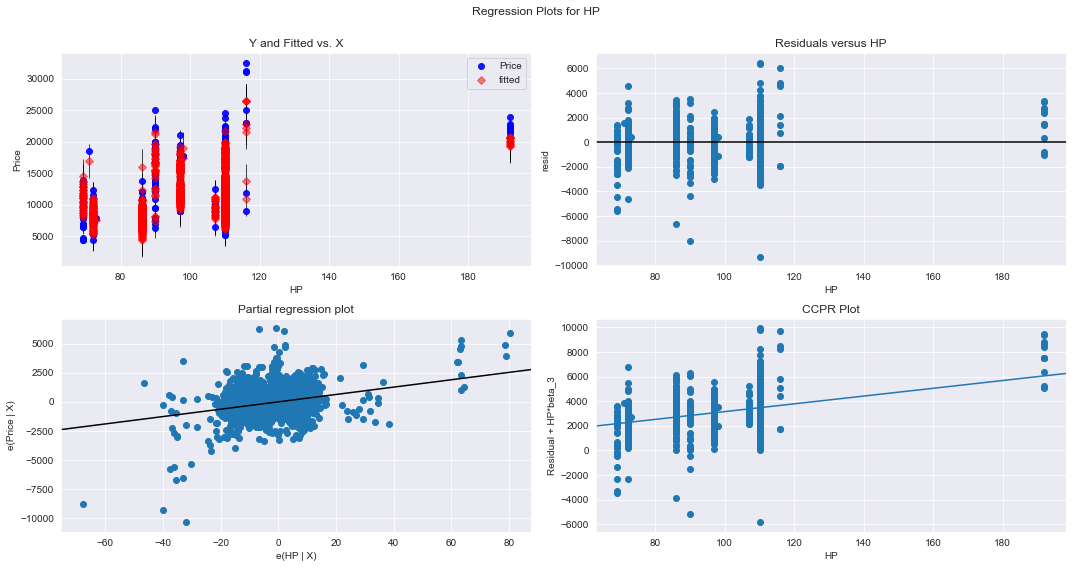

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

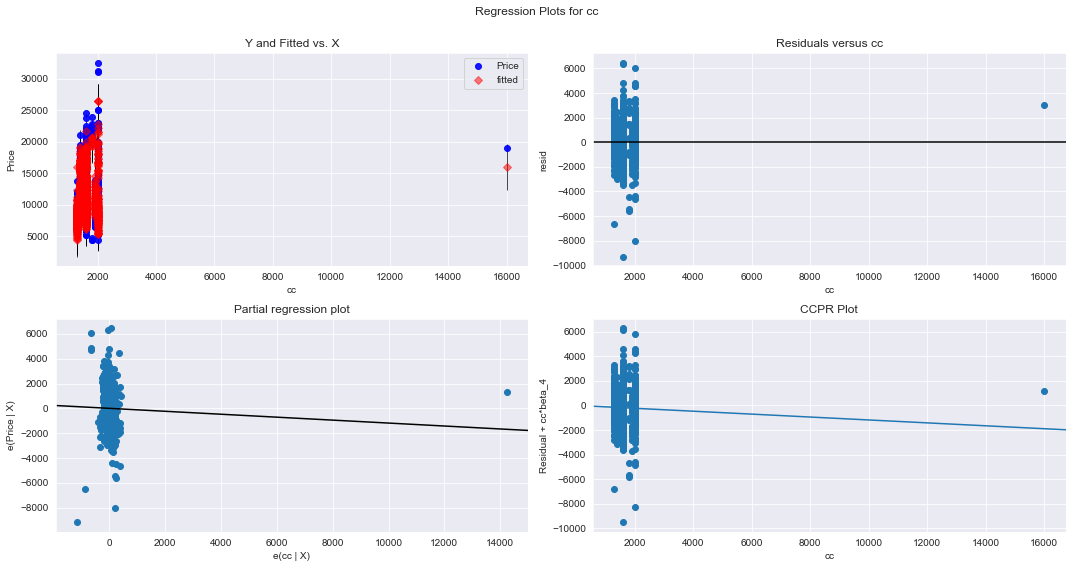

In [41]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

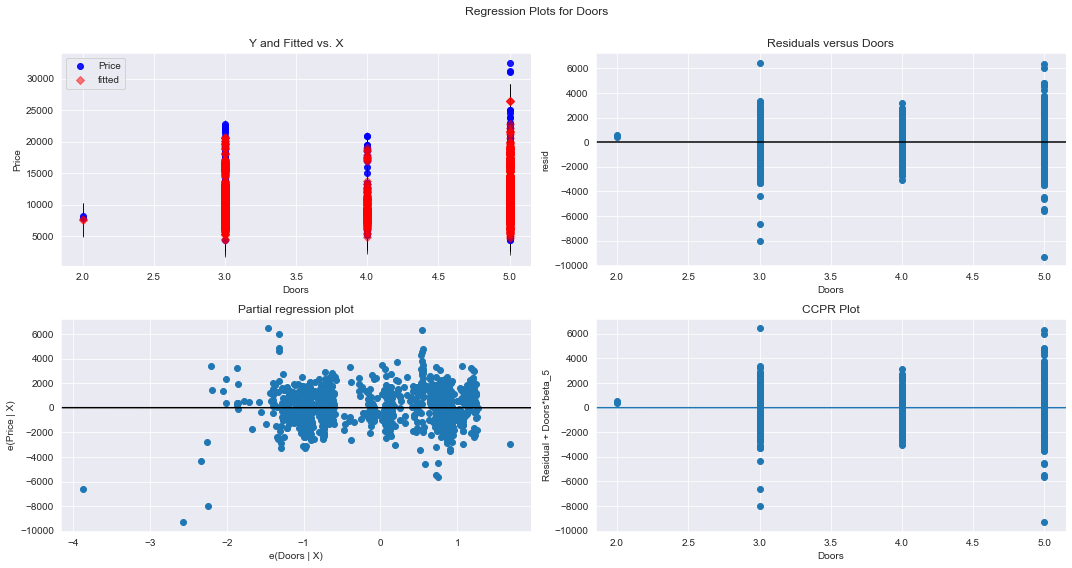

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

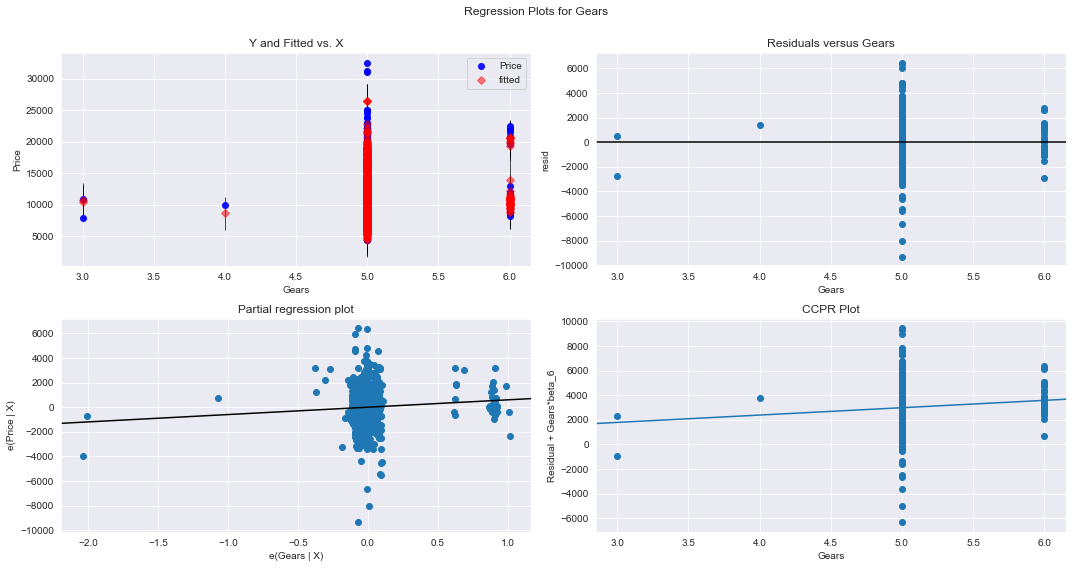

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

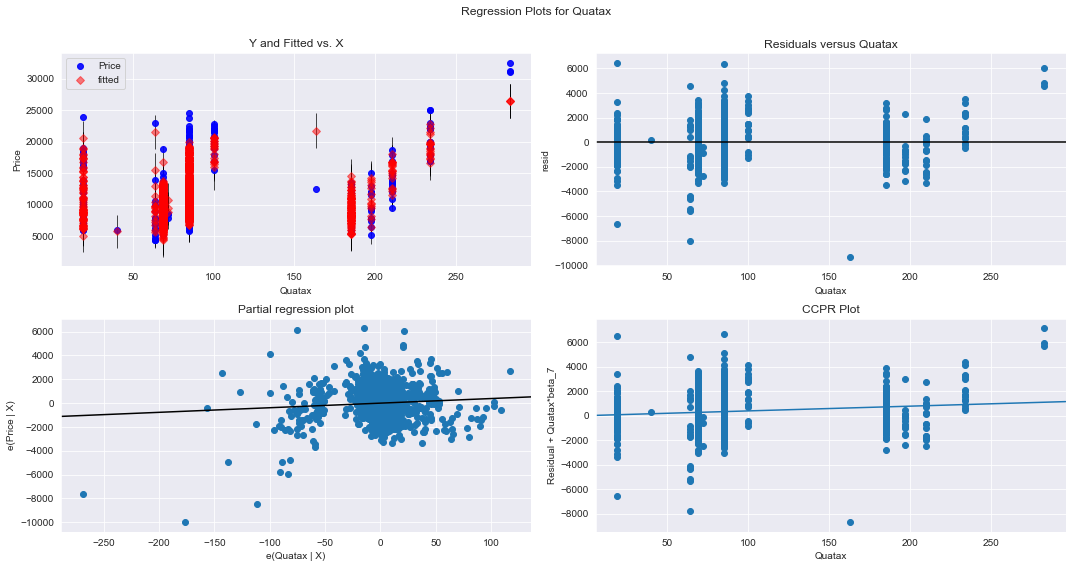

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quatax',fig=fig)
plt.show()

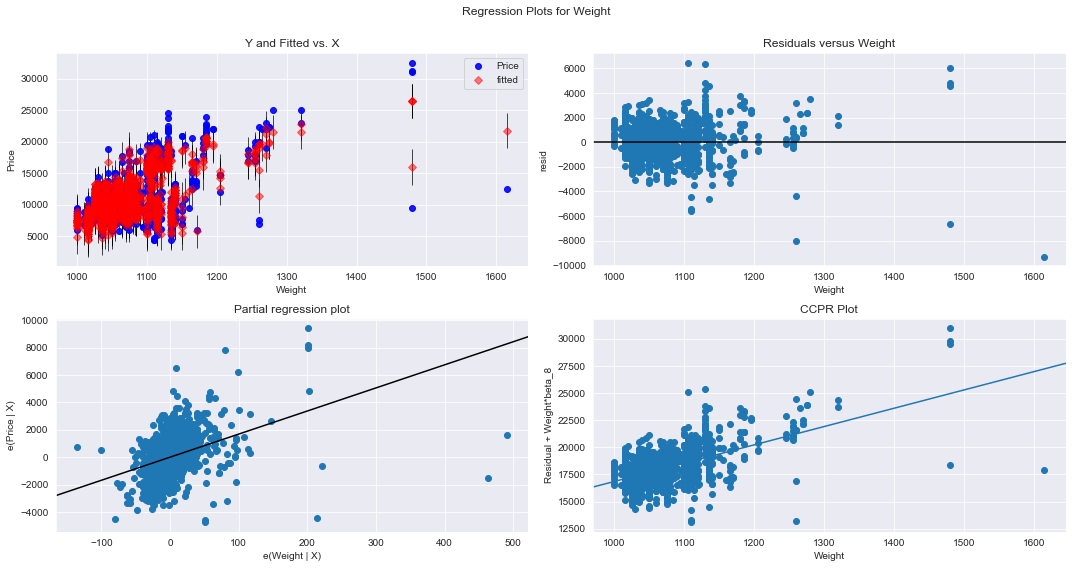

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [46]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

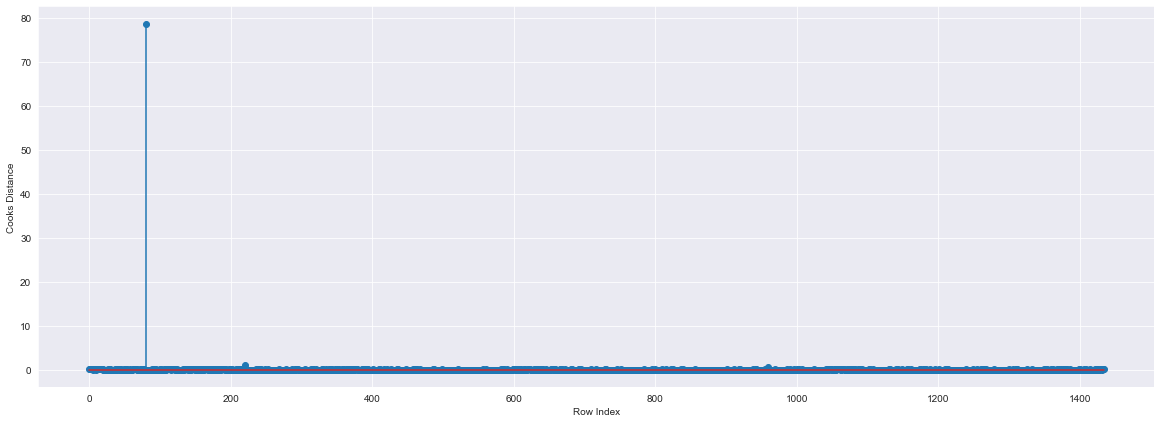

In [48]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

In [51]:
from statsmodels.graphics.regressionplots import influence_plot

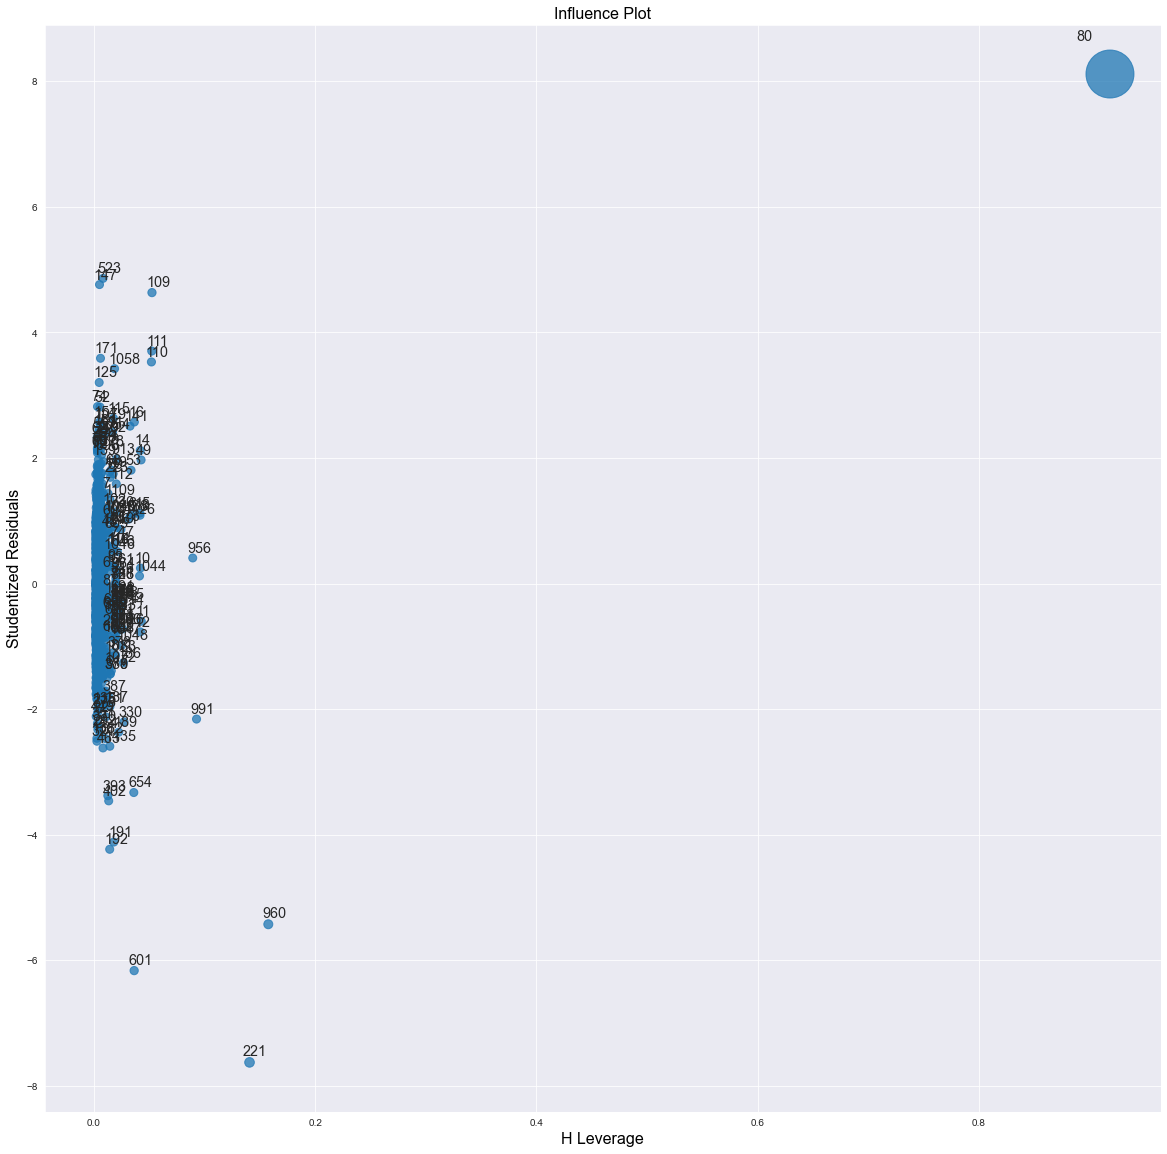

In [52]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [53]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [54]:
df2[df2.index.isin([80])] 

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [59]:
# Creating a copy of data so that original dataset is not affected
toyo_new=df2.copy()
toyo_new

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [60]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [62]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quatax+Weight',data=toyo5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyo5
    else:
        final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quatax+Weight',data=toyo5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [63]:
final_model.rsquared

0.9003762532318559

In [64]:
toyo5

,Price,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


In [66]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quatax":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Quatax,Weight
0,12,40000,80,1300,4,5,69,1012


In [67]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14398.815471
dtype: float64

In [68]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo5)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64